In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf

In [20]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 10000,
    n_features = 50, 
    n_informative = 35,
    n_redundant = 15,
    n_classes = 4,
    weights = [0.25, 0.25, 0.25, 0.25],
    random_state = 42,
)

cols = [f'Hususiyat_{i+1}' for i in range(len(X[0]))]
df = pd.DataFrame(X, columns = cols)
df['target'] = y
df.head()

,Hususiyat_1,Hususiyat_2,Hususiyat_3,Hususiyat_4,Hususiyat_5,Hususiyat_6,Hususiyat_7,Hususiyat_8,Hususiyat_9,Hususiyat_10,...,Hususiyat_42,Hususiyat_43,Hususiyat_44,Hususiyat_45,Hususiyat_46,Hususiyat_47,Hususiyat_48,Hususiyat_49,Hususiyat_50,target
0,-3.829149,-15.616470,9.158026,-8.098128,7.266869,-1.711200,6.546805,0.340660,-2.390198,12.819839,...,-0.278534,1.424548,-3.782744,-1.891090,-3.281068,-3.314894,-2.481401,2.079283,5.816571,1
1,0.737875,-0.421161,0.413262,1.879897,-2.951563,0.972342,-1.837012,-3.195463,1.050640,-8.399948,...,5.748830,-1.320603,-8.782590,2.077068,0.711459,2.438542,-0.571515,-2.848832,-10.315526,0
2,0.949210,2.674257,-4.085739,-5.800049,-2.866183,0.636044,2.102187,6.815251,-2.446099,-21.943650,...,-0.740513,4.863390,-2.480826,5.557675,0.980068,-1.744162,-4.432953,3.822582,-0.044013,3
3,-1.087774,-11.427148,-26.047114,4.376803,16.786633,-0.411104,-0.194099,-5.989625,-2.597773,0.349290,...,6.501248,-1.901300,-2.936669,-0.618479,-2.890830,3.886328,-2.179567,1.571246,-16.506496,1
4,-4.945788,20.677985,-13.375869,-0.232089,19.574830,-3.678291,17.108031,-10.146709,4.389545,1.424338,...,-2.079750,0.363138,-8.638989,1.620364,3.238004,7.506145,-2.936029,-0.199775,0.501586,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(8000, 50)
(2000, 50)
(8000,)
(2000,)


## DNN model yasash

In [22]:
input_layer = tf.keras.layers.Input(shape = (50,))
hidden_layer_1 = tf.keras.layers.Dense(20, activation='relu')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(20, activation='relu')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(10, activation='relu')(hidden_layer_2)
output_layer = tf.keras.layers.Dense(4, activation='softmax')(hidden_layer_3)

model_dnn = tf.keras.models.Model(input_layer, output_layer)
model_dnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,694 (6.62 KB)

 Trainable params: 1,694 (6.62 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_dnn.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = ['accuracy']
)

history_dnn = model_dnn.fit(
    X_train, y_train, epochs=15,
    batch_size=16,
    validation_data = (X_test, y_test)
)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.9579 - loss: 0.1471 - val_accuracy: 0.8680 - val_loss: 0.7013
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9563 - loss: 0.1456 - val_accuracy: 0.8670 - val_loss: 0.6613
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9597 - loss: 0.1417 - val_accuracy: 0.8655 - val_loss: 0.7194
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9571 - loss: 0.1434 - val_accuracy: 0.8630 - val_loss: 0.7121
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9551 - loss: 0.1432 - val_accuracy: 0.8610 - val_loss: 0.6896
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9581 - loss: 0.1433 - val_accuracy: 0.8665 - val_loss: 0.7375
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9575 - loss: 0.1419 - val_accuracy: 0.8620 - val_loss: 0.7346
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9582 - loss: 0.1444 - 

In [36]:
test_loss, test_acc = model_dnn.evaluate(X_test, y_test, verbose=2)
test_acc * 100

63/63 - 0s - 2ms/step - accuracy: 0.8645 - loss: 0.7255


86.44999861717224

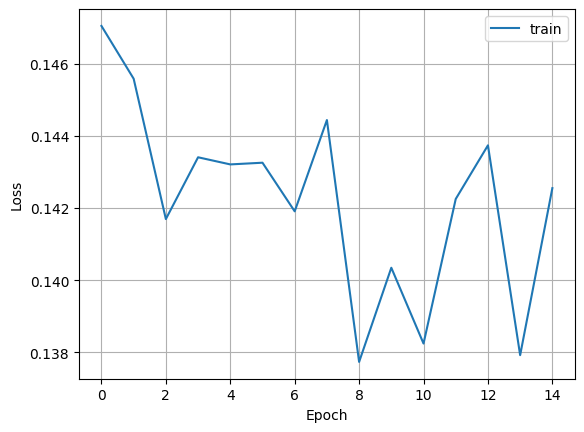

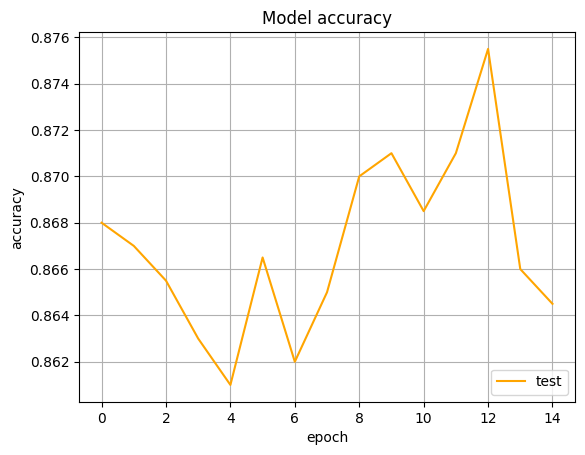

In [37]:
plt.plot(history_dnn.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train'], loc = 'upper right')
plt.grid()

plt.show()

plt.plot(history_dnn.history['val_accuracy'], color = 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc = 'lower right')
plt.grid()

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


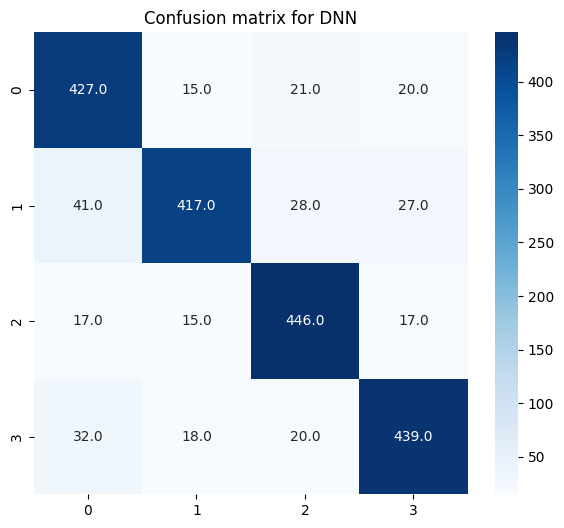

In [38]:
predictions_dnn = np.argmax(model_dnn.predict(X_test), axis=1)
cm = confusion_matrix(y_test, predictions_dnn)

plt.figure(figsize = (7, 6))
sns.heatmap(cm, annot = True, fmt = '.1f', cmap = 'Blues')
plt.title('Confusion matrix for DNN')
plt.show()

In [39]:
model_dnn.save('DNN_model.keras')

In [40]:
from tensorflow.keras.models import load_model

loaded_model = load_model('DNN_model.keras')

new_data = X_test[:5]
predictions = np.argmax(loaded_model.predict(new_data), axis = 1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([3, 1, 3, 1, 0])